# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'544b1c3beaa3b05e47eee5b025d7893d'

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = [-90, 90]
lng_range = [-180, 180]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}


url = f"https://api.openweathermap.org/data/2.5/weather?"
#lat={lat}&lon={lon}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
 # Add 1 to the record count
    record_count += 1     
    
 # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ayacucho
Processing Record 2 of Set 1 | spearfish
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | buala
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | glendive
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | belyy yar
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | mercedes
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | dryden
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | te anau
Processing Record 18 of Set 1 | terrace bay
Processing Record 19 of Set 1 | bengkalis
City not found. Skipping...
Processing Record 20 of Set 1 | ponta delgada
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 1 | tasiilaq
Pr

Processing Record 39 of Set 4 | abu dhabi
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | general pico
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | semenivka
Processing Record 45 of Set 4 | nome
Processing Record 46 of Set 4 | riwaka
Processing Record 47 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 4 | faranah
Processing Record 49 of Set 4 | mugumu
Processing Record 0 of Set 5 | ilulissat
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | maragogi
Processing Record 3 of Set 5 | saskylakh
Processing Record 4 of Set 5 | sao francisco
Processing Record 5 of Set 5 | atikokan
Processing Record 6 of Set 5 | polyarnyy
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | sanchor
Processing Record 9 of Set 5 | brae
Processing Record 10 of Set 5 | gamba
Processing Record 11 of Set 5 | tromso
P

Processing Record 28 of Set 8 | baykit
Processing Record 29 of Set 8 | severo-kurilsk
Processing Record 30 of Set 8 | saint-georges
Processing Record 31 of Set 8 | salinopolis
Processing Record 32 of Set 8 | gorin
Processing Record 33 of Set 8 | port augusta
Processing Record 34 of Set 8 | cabinda
Processing Record 35 of Set 8 | beloha
Processing Record 36 of Set 8 | kudat
Processing Record 37 of Set 8 | ottumwa
Processing Record 38 of Set 8 | lewisporte
Processing Record 39 of Set 8 | talnakh
Processing Record 40 of Set 8 | barabinsk
Processing Record 41 of Set 8 | socorro
Processing Record 42 of Set 8 | tabialan
City not found. Skipping...
Processing Record 43 of Set 8 | mineiros
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | sangar
Processing Record 46 of Set 8 | waitati
Processing Record 47 of Set 8 | kruisfontein
Processing Record 48 of Set 8 | kadoma
Processing Record 49 of Set 8 | hobyo
Processing Record 0 of Set 9 | russell
Processing Record 1 of Set 9 |

Processing Record 15 of Set 12 | nguiu
City not found. Skipping...
Processing Record 16 of Set 12 | novoagansk
Processing Record 17 of Set 12 | anadyr
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | stephenville
Processing Record 20 of Set 12 | bastia
Processing Record 21 of Set 12 | saint-augustin
Processing Record 22 of Set 12 | lichinga
Processing Record 23 of Set 12 | lampazos de naranjo
Processing Record 24 of Set 12 | sorland
Processing Record 25 of Set 12 | mount isa
Processing Record 26 of Set 12 | bitung
Processing Record 27 of Set 12 | doume
Processing Record 28 of Set 12 | puerto del rosario
Processing Record 29 of Set 12 | dera bugti
Processing Record 30 of Set 12 | rosario
Processing Record 31 of Set 12 | fukue
Processing Record 32 of Set 12 | wanaka
Processing Record 33 of Set 12 | madona
Processing Record 34 of Set 12 | killam
Processing Record 35 of Set 12 | los llanos de aridane
Processing Record 36 of Set 12 | tumaco
Processing Record 37 of 

[{'City': 'ayacucho',
  'Lat': -13.1583,
  'Lng': -74.2239,
  'Max Temp': 17.92,
  'Humidity': 59,
  'Cloudiness': 20,
  'Wind Speed': 1.54,
  'Country': 'PE',
  'Date': 1674915941},
 {'City': 'spearfish',
  'Lat': 44.4908,
  'Lng': -103.8594,
  'Max Temp': -8.83,
  'Humidity': 83,
  'Cloudiness': 100,
  'Wind Speed': 6.17,
  'Country': 'US',
  'Date': 1674915942},
 {'City': 'butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 27.2,
  'Humidity': 78,
  'Cloudiness': 10,
  'Wind Speed': 11.34,
  'Country': 'KI',
  'Date': 1674915943},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 25.59,
  'Humidity': 74,
  'Cloudiness': 70,
  'Wind Speed': 4.04,
  'Country': 'PF',
  'Date': 1674915943},
 {'City': 'buala',
  'Lat': -8.145,
  'Lng': 159.5921,
  'Max Temp': 26.3,
  'Humidity': 81,
  'Cloudiness': 87,
  'Wind Speed': 0.96,
  'Country': 'SB',
  'Date': 1674915944},
 {'City': 'puerto ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 26.98,
  'Hu

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ayacucho,-13.1583,-74.2239,17.92,59,20,1.54,PE,1674915941
1,spearfish,44.4908,-103.8594,-8.83,83,100,6.17,US,1674915942
2,butaritari,3.0707,172.7902,27.20,78,10,11.34,KI,1674915943
3,rikitea,-23.1203,-134.9692,25.59,74,70,4.04,PF,1674915943
4,buala,-8.1450,159.5921,26.30,81,87,0.96,SB,1674915944


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("./output/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ayacucho,-13.1583,-74.2239,17.92,59,20,1.54,PE,1674915941
1,spearfish,44.4908,-103.8594,-8.83,83,100,6.17,US,1674915942
2,butaritari,3.0707,172.7902,27.20,78,10,11.34,KI,1674915943
3,rikitea,-23.1203,-134.9692,25.59,74,70,4.04,PF,1674915943
4,buala,-8.1450,159.5921,26.30,81,87,0.96,SB,1674915944


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

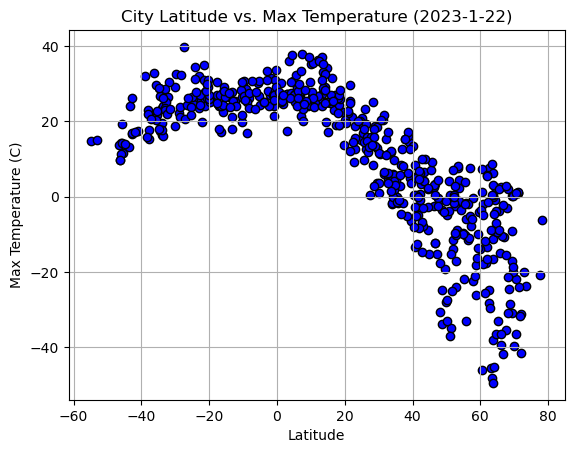

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Max Temp"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-1-22)")
plt.grid()


# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

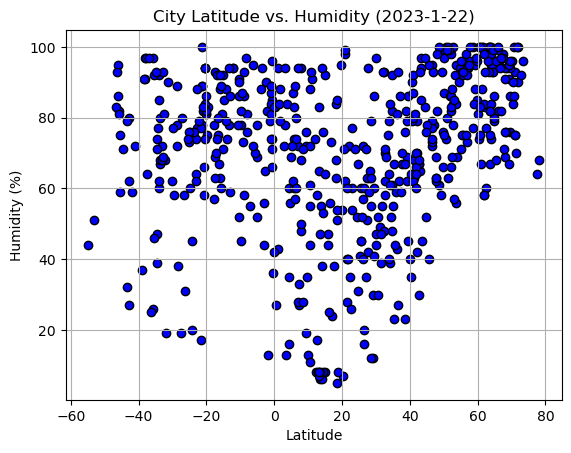

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Humidity"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-1-22)")
plt.grid()


# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

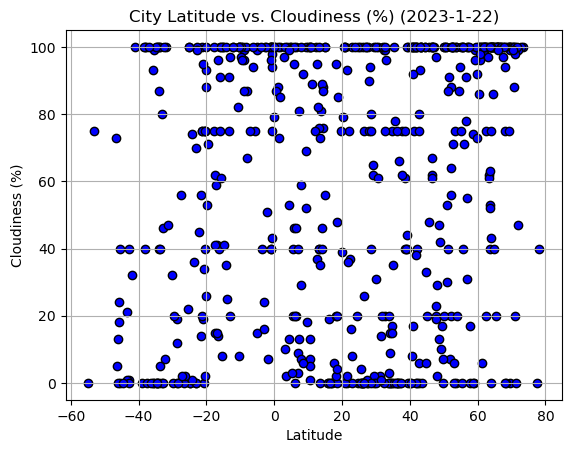

In [15]:
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Cloudiness"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

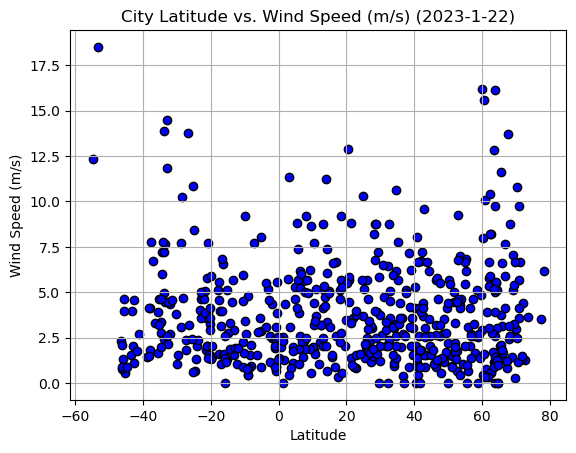

In [16]:
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Wind Speed"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (m/s) (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lineregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_analysis = pd.DataFrame({"slope":[slope], "intercept":[intercept], "rvalue":[rvalue], "pvalue":[pvalue], "stderr":[stderr]})
    return print(f"rvalue is {rvalue}"), regression_analysis


# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,spearfish,44.4908,-103.8594,-8.83,83,100,6.17,US,1674915942
2,butaritari,3.0707,172.7902,27.20,78,10,11.34,KI,1674915943
6,tuktoyaktuk,69.4541,-133.0374,-31.00,76,0,3.09,CA,1674915946
8,glendive,47.1053,-104.7125,-15.29,78,100,4.63,US,1674915675
10,belyy yar,53.6039,91.3903,-1.06,56,0,7.00,RU,1674915949


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ayacucho,-13.1583,-74.2239,17.92,59,20,1.54,PE,1674915941
3,rikitea,-23.1203,-134.9692,25.59,74,70,4.04,PF,1674915943
4,buala,-8.1450,159.5921,26.30,81,87,0.96,SB,1674915944
5,puerto ayora,-0.7393,-90.3518,26.98,85,43,0.89,EC,1674915945
7,bredasdorp,-34.5322,20.0403,17.35,74,100,6.00,ZA,1674915947


###  Temperature vs. Latitude Linear Regression Plot

rvalue is -0.8362612896835976


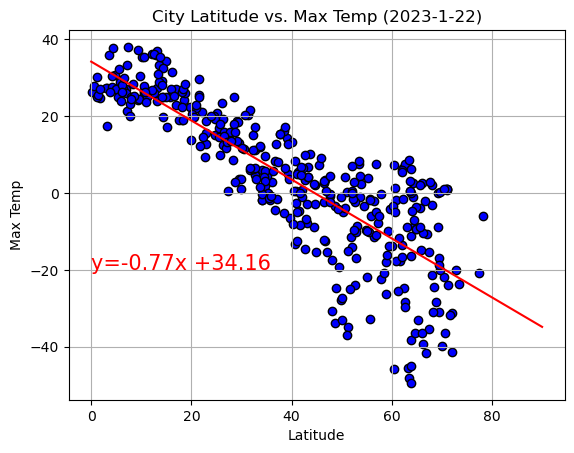

In [101]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Max Temp"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig5.png")


rvalue is 0.5326125456774072


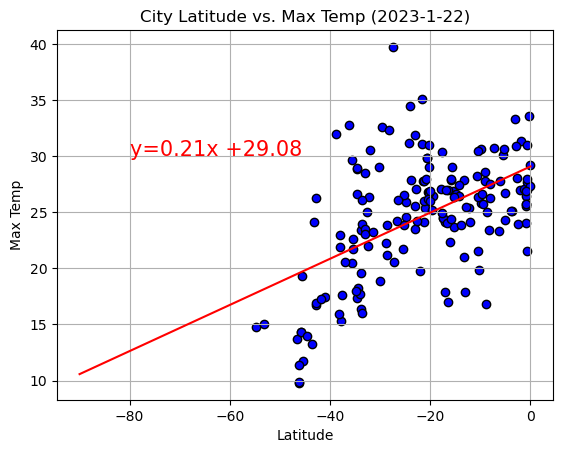

In [107]:
# Linear regression on Southern Hemisphere

# YOUR CODE HERE
regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Max Temp"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-80,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig6.png")

**Discussion about the linear relationship:** Results show that as we get closer to the equator (latitude = 0)  in both southern and northern hemisphere temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

rvalue is 0.5387577736320486


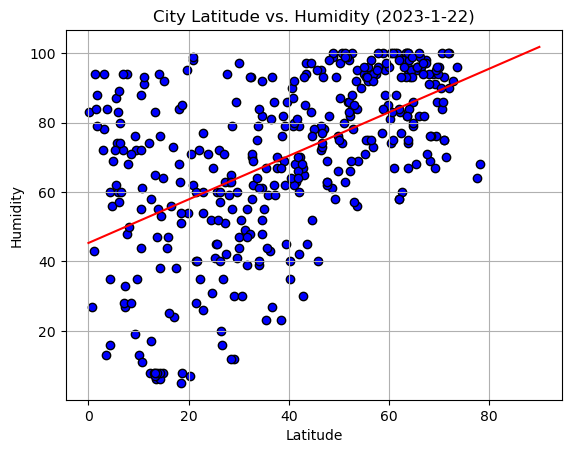

In [108]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere

regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Humidity"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig7.png")

rvalue is 0.13382837441632603


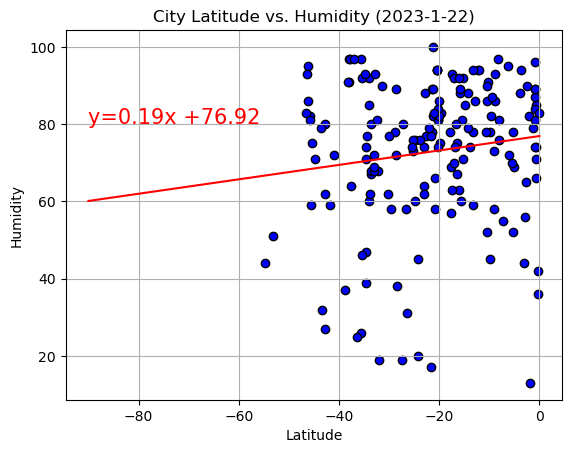

In [112]:
# Southern Hemisphere
regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Humidity"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig8.png")

**Discussion about the linear relationship:** In the northern hemisphere during the month of January, as we get closer to the north pole humidity increases. However, in the southern hemisphere during the month of January, as we get closer to the equator humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

rvalue is 0.23273080350260283


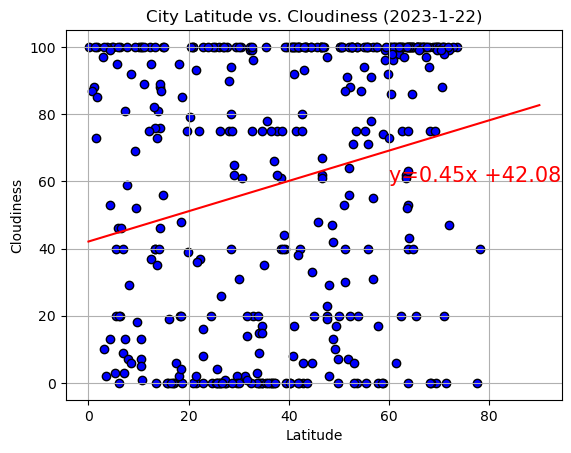

In [118]:
# Northern Hemisphere

regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(60,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig9.png")

rvalue is 0.41878714576991843


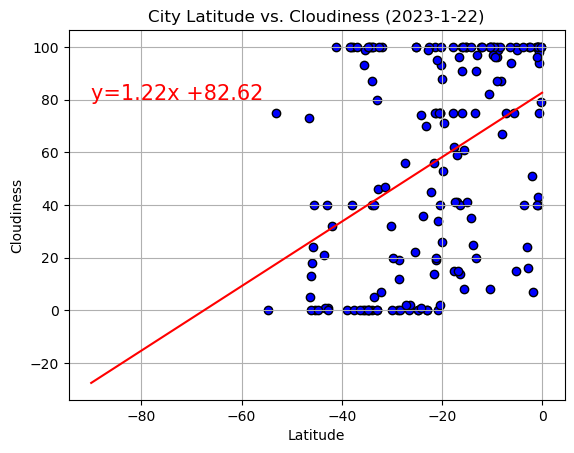

In [119]:
# Southern Hemisphere
regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig10.png")

**Discussion about the linear relationship:** The r values are small that means there are no specific correlation between cloudiness and latitude in both southern and norther hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

rvalue is 0.0232396274271461


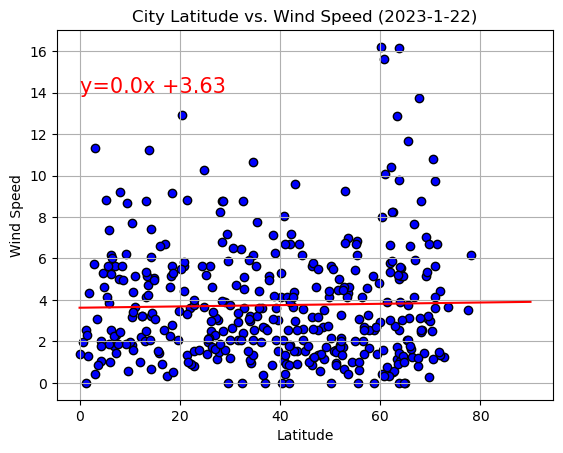

In [121]:
# Northern Hemisphere
regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Wind Speed"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig11.png")

rvalue is -0.2423533053326654


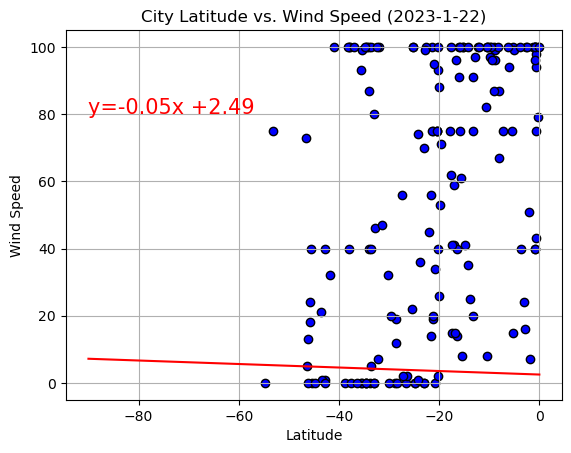

In [122]:
# Southern Hemisphere
regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig12.png")

**Discussion about the linear relationship:** The r values are small that means there are no specific correlation between wind speed and latitude in both southern and norther hemisphere.